<a href="https://colab.research.google.com/github/bulatych/NGS_course/blob/main/HW2_server_snakemake_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Theory [2]

* [0.4] What are [computer ports](https://www.cloudflare.com/learning/network-layer/what-is-a-computer-port/) on a high level? How many ports are there on a typical computer?
* [0.4] What is Nginx? How does it work on the high level? List several alternative web servers.
* [0.4] What is SSH, and for what is it typically used? Explain two ways to authenticate in an SSH server in detail.
* [0.4] What is a pipeline (in bioinformatics)? Why are they so popular in bioinformatics and not in other areas?
* [0.4] Explain how Snakemake and Nextflow work on the high level. I.e., what are their general paradigms?

## Problem [6.5]

A real-life situation that occurred to me several times over the years.

Imagine wrapping up a large bioinformatics project and wanting to share raw data with your colleagues in a friendly and straightforward format. The best option would be to use an online genome browser and host your data remotely, so it is easily accessible by anyone with a valid link. This is exactly what we will be doing here.

*Please consider doing this HW using Linux since setting up the SSH client on Windows is painful, and I won't be able to help you.*


Steps:
* [1.5] Create a new virtual machine in the Yandex/Mail/etc cloud (order at least 10GB of free disk space). Generate SSH key pair and use it to connect to your server.

Example of what your machine can look like
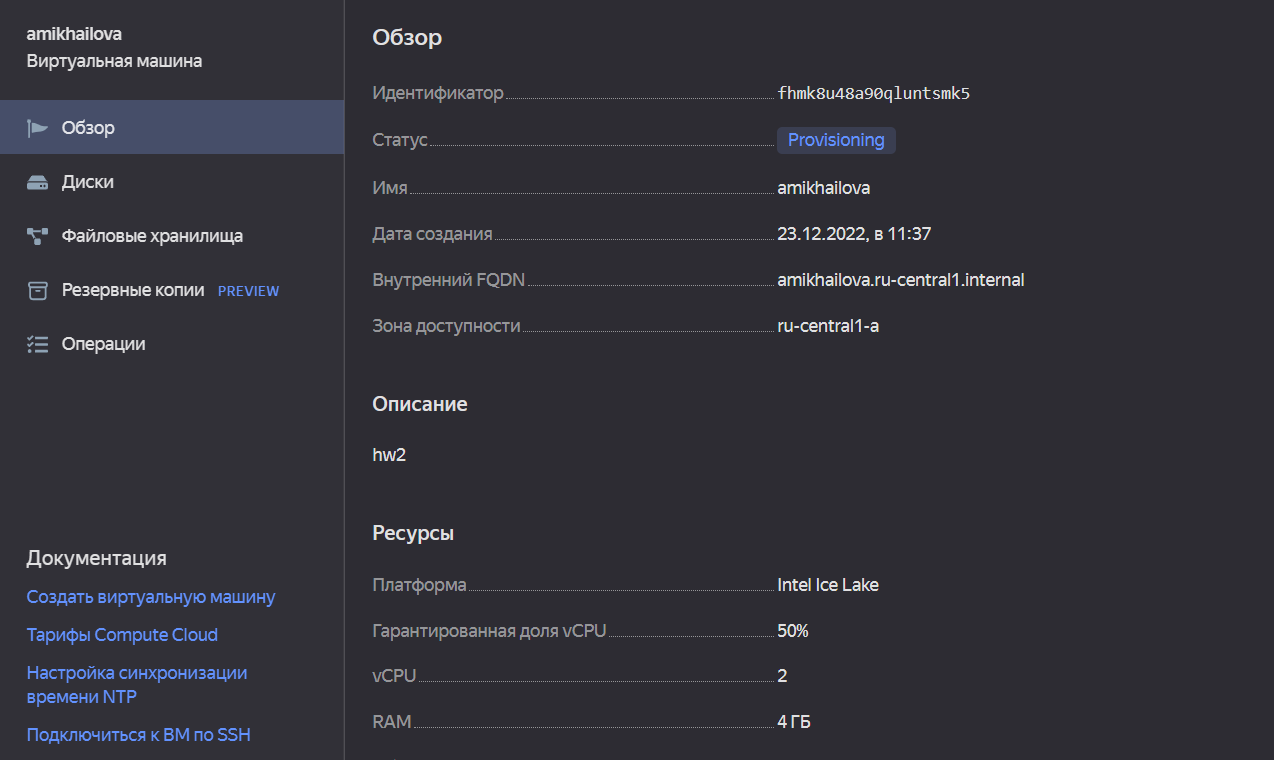

* [1] Download and install [JBrowse 2](https://jbrowse.org/jb2/). Create a new jbrowse [repository](https://jbrowse.org/jb2/docs/cli/#jbrowse-create-localpath) in `/mnt/JBrowse/` (or some other folder).

<u>*TIP*</u>  One of the possible way is via [npm](https://www.npmjs.com/package/@jbrowse/cli).
Do not forget `jbrowse create JBrowse`

* [0.5] Install nginx and amend its config(/etc/nginx/nginx.conf) to contain the following section:
```
http {
  # Don't touch other options!
  # ........
  # ........

  # Comment this:
  #include /etc/nginx/sites-enabled/*

  # Add this:
  server {
		listen 80;
		index index.html;
    server_name _;

		location /jbrowse/ {
			alias /home/user/JBrowse/;
		}
	}

  # ........
}
```
* [0.5] Restart the nginx (reload its config) and make sure that you can access the browser using a link like this: `http://64.129.58.13/jbrowse/`. Here `64.129.58.13` is your public IP address.

* [1] Download the latest human genome assembly (GRCh38) from the Ensemble FTP server ([fasta](https://ftp.ensembl.org/pub/release-108/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz), [GFF3](https://ftp.ensembl.org/pub/release-108/gff3/homo_sapiens/Homo_sapiens.GRCh38.108.gff3.gz)). Index the fasta using samtools (`samtools faidx`) and GFF3 using tabix.

<u>*TIP*</u> there is an bgzip error in gff3 file, code below can help you

` grep -v "^#" Homo_sapiens.GRCh38.108.gff3 | sort -t"`printf '\t'`" -k1,1 -k4,4n) | bgzip > sorted.Homo_sapiens.GRCh38.108.gff3.gz;`

* [1] Select and download BED files for three ChIP-seq and one ATAC-seq experiment from the ENCODE (use one tissue/cell line). Sort, bgzip, and index them using tabix.

<u>*TIP*</u> You can you the data from ML homework.

* [1] [Add](https://jbrowse.org/jb2/docs/cli/) your files to the genome browser and verify that everything works as intended. Don't forget to [index](https://jbrowse.org/jb2/docs/cli/#jbrowse-text-index) the genome annotation, so you could later search by gene names.


**Remember to put a persistent link to a session with all your BED files and the genome annotation in the report. I must be able to access it without problems.**


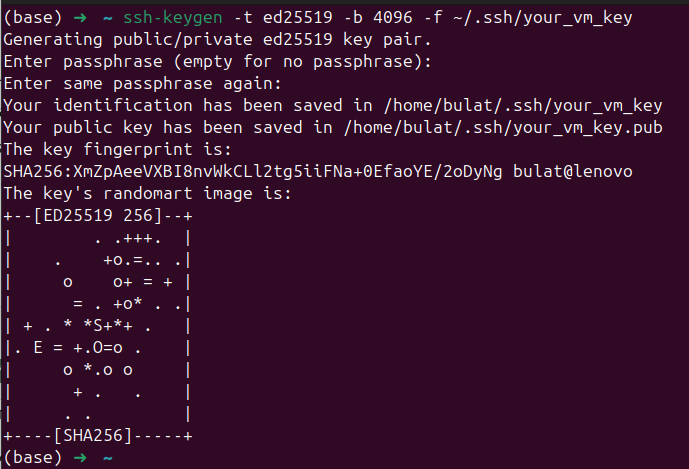


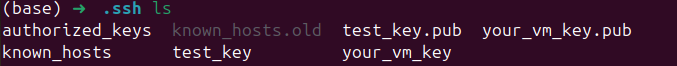

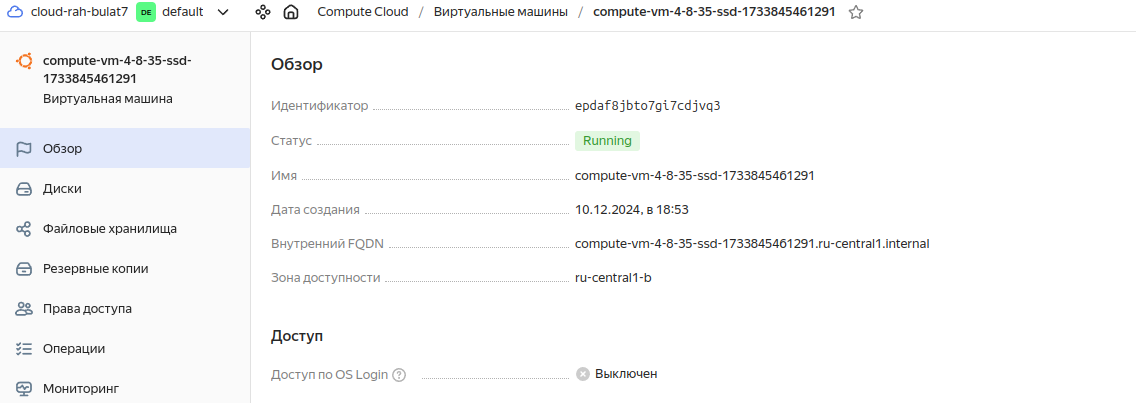

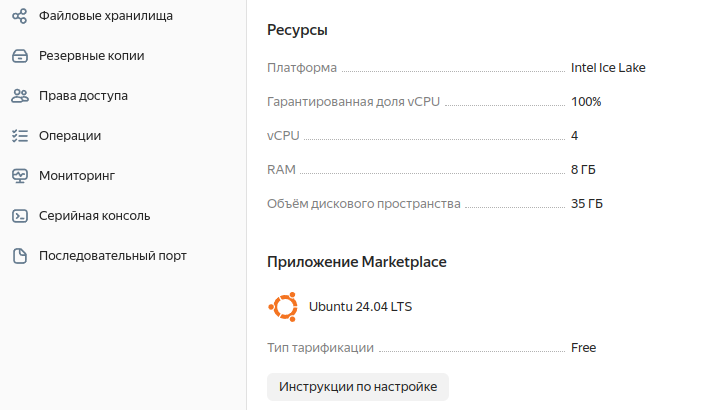

## Extra points [1.5]

* [1.25] Wrap 3 last steps into Snakemake pipeline.

<u>*TIP*</u> You may have the rules below. Rule to add assembly to JBrowse. Rule to process and add tracks to JBrowse. Rule to add GFF3 track to JBrowse. Rule to add BED tracks to JBrowse.

* [0.25] Add a picture that represents your experience with this HW.